# 1D Gaussian Mixture Model

Source: https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

Step 1: Decide how many clusters (c) we want to fit our data

Step 2: Initialize the parameters: mean, covariance, fraction per class per cluster. 

Expectation Maximization (EM): E-Step
1. Calculate for each datapoint x_i the probability r_ic that datapoint x_i belong to cluster c with the weight-normalized probability density function of a multivariate Gaussian. 

Expectation Maximization (EM): M-Step
1. For each cluster, calculate the total weight and update the fraction per class per cluster,
mean, and covariance using what we calculated in the E-Step. 

Iteratively repeat the E and M step until the log-likelihood function of the model converges where the log likelihood is computed with ...

## GMM in Python from scratch

In [67]:
# import modules
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(0)

# generate the data
X = np.linspace(-5, 5, num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

Plot the data to show

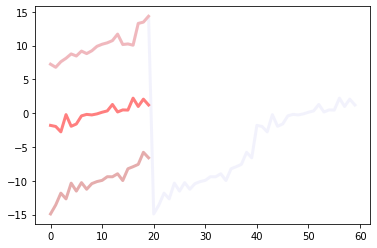

In [68]:
# print a data cluster to show the data
fig, ax = plt.subplots()

data = [ X_tot, X0 , X1, X2]
colors = ['lavender', 'lightcoral', 'indianred', 'red']

for i in range(len(data)):
    ax.plot(data[i], color=colors[i], alpha=0.5, linewidth=3)

In [69]:
"""Create the array r with dimensionality nxK"""

# the array r is the probability where each row contains the probability that x belongs
# one of the three clusters

r = np.zeros((len(X_tot),3))  
print('Dimensionality','=',np.shape(r)) # 20 points from each cluster x 3 clusters

"""Instantiate the random gaussians"""

gauss_1 = norm(loc=-5,scale=5) # loc = mean, scale = standard deviation
gauss_2 = norm(loc=5,scale=3)
gauss_3 = norm(loc=1.5,scale=1)

Dimensionality = (60, 3)


Plot the data to show

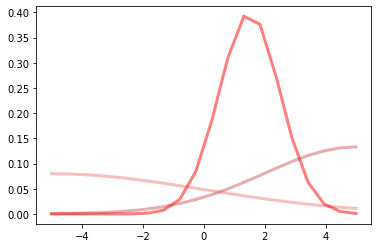

In [70]:
# print a data cluster to show the data
fig, ax = plt.subplots()

data = [gauss_1, gauss_2, gauss_3]
colors = ['lightcoral', 'indianred', 'red']

for i in range(len(data)):
    ax.plot(X, data[i].pdf(X), color=colors[i], alpha=0.5, linewidth=3)

Calculate the probability for each datapoint x_i belonging to gaussian g

In [78]:
"""Instantiate the random pi_c"""
pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 
# in this case, we assign uniform priors. 

"""
Probability for each datapoint x_i to belong to gaussian g 
"""
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) 
    # Write the probability that x belongs to gaussian c in column c. 
    # Therewith we get a 60x3 array filled with the probability that each x_i belongs 
    # to one of the gaussians

plot the probabilities of each column

Text(0.5, 1.0, 'Probabilities that datapoint x_i belongs to gaussian g')

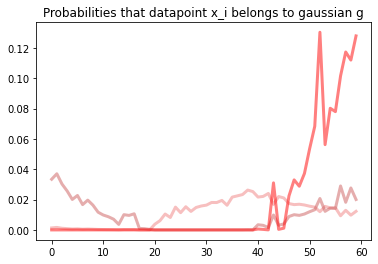

In [79]:
# print a data cluster to show the data
fig, ax = plt.subplots()

colors = ['lightcoral', 'indianred', 'red']

for i in range(np.shape(r)[1]):
    ax.plot(r[:,i], color=colors[i], alpha=0.5, linewidth=3)

plt.title('Probabilities that datapoint x_i belongs to gaussian g')

In [80]:
i=1

# print r for reference
print(r[i])

# print sum of weight
print(np.sum(pi))

# print sum of weights for r_i
print(np.sum(r,axis=1)[i])

# print adjust prob
print(r[i]/((np.sum(pi)*np.sum(r,axis=1)[i])))

[1.64172144e-03 3.70214854e-02 1.05449398e-07]
1.0
0.03866331231942314
[4.24619967e-02 9.57535276e-01 2.72737620e-06]


In [82]:
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by pi_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])

"""In the last calculation we normalized the probabilites r_ic. So each row i in r gives us the probability for x_i 
to belong to one gaussian (one column per gaussian). Since we want to know the probability that x_i belongs 
to gaussian g, we have to do some math like a simple calculation of percentage where we want to know how likely it is in % that
x_i belongs to gaussian g. 

To realize this we must divide the probability of each r_ic by the total probability r_i: 
this is done by summing up each row in r and divide each value r_ic by sum(np.sum(r,axis=1)[r_i] )).

To get this, look at the above plot and pick an arbitrary datapoint. Pick one gaussian and imagine the probability that this datapoint
belongs to this gaussian. This value will normally be small since the point is relatively far away right? So what is
the percentage that this point belongs to the chosen gaussian? 

--> Correct, the probability that this datapoint belongs to this 
gaussian divided by the sum of the probabilites for this datapoint and all three gaussians. Since we don't know how many
point belong to each cluster c and threwith to each gaussian c, we have to make assumptions and in this case simply said that we 
assume that the points are equally distributed over the three clusters."""
    
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## the above was the Expectation step

Let's plot what we did to review:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

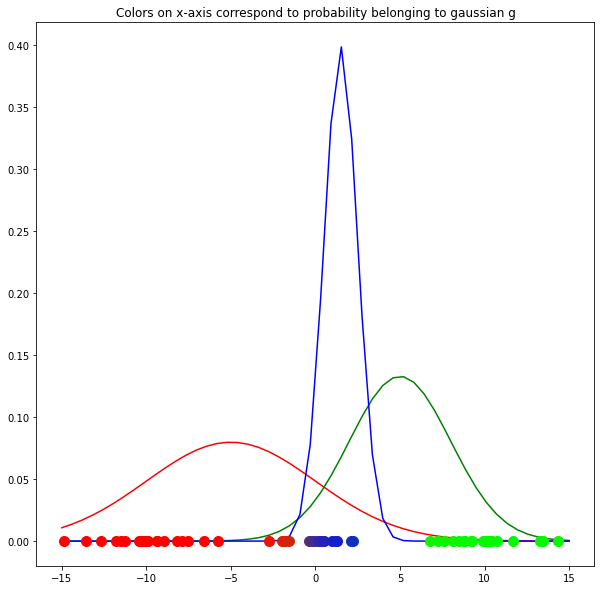

In [93]:
"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue

for g,c in zip([gauss_1.pdf(np.linspace(-15,15)),gauss_2.pdf(np.linspace(-15,15)),gauss_3.pdf(np.linspace(-15,15))],['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)

    
plt.title("Colors on x-axis correspond to probability belonging to gaussian g")
plt.show()

So have fitted three arbitrarily chosen gaussian models to our dataset. Therefore we have introduced a new variable which we called r and in which we have stored the probability for each point xi to belong to gaussian g or to cluster c, respectively. Next we have plotted the xi points and colored according to their probabilities for the three clusters. You can see that the points which have a very high probability to belong to one specific gaussian, has the color of this gaussian while the points which are between two gaussians have a color which is a mixture of the colors of the corresponding gaussians.

## To extrapolate this to higher dimensions 

for multidimensional cases: 
* the single mean value μ for the calculation of each gaussian changes to a mean vector μ with one entry per dimension
* the single variance value σ2 per gaussian changes to a nxn covariance matrix Σ where n is the number of dimensions in the dataset.

## Continuing with our example, we run one iteration of the EM method:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

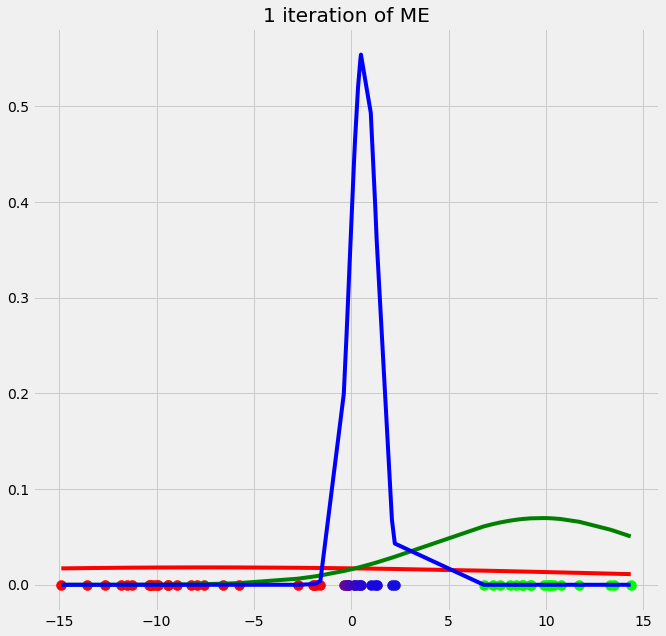

In [95]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

"""
E-Step
"""

"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_tot),3))  

"""Instantiate the random gaussians"""

gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)

"""Instantiate the random mu_c"""
m = np.array([1/3,1/3,1/3]) # We expect to have three clusters 

pi = m/np.sum(m)


"""
Probability for each datapoint x_i to belong to gaussian g 
"""
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])


"""M-Step"""


"""calculate m_c"""
m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:,c])
    m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
    
"""calculate pi_c"""
pi_c = []
for m in m_c:
    pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

"""calculate mu_c"""
mu_c = np.sum(X_tot.reshape(len(X_tot),1)*r,axis=0)/m_c


"""calculate var_c"""
var_c = []

for c in range(len(r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1)-mu_c[c])).T,(X_tot.reshape(len(X_tot),1)-mu_c[c])))
  

    
    
"""Update the gaussians"""

gauss_1 = norm(loc=mu_c[0],scale=var_c[0]) 
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])



"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 


"""Plot the gaussians"""


for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)

    
plt.title("1 iteration of ME")
    
plt.show()

So as you can see the occurrence of our gaussians changed dramatically after the first EM iteration. Let's update r and illustrate the coloring of the points.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

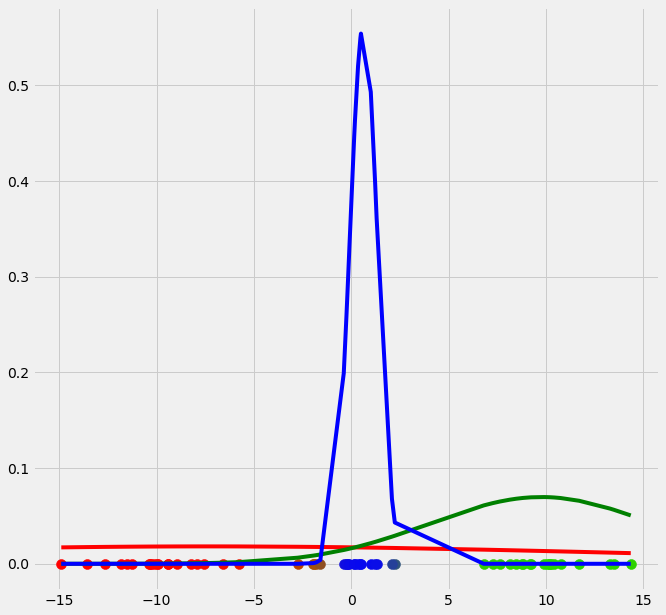

In [96]:
"""update r"""

"""
Probability for each datapoint x_i to belong to gaussian g 
"""
# Mind that we use the new pi_c here
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) 
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi_c)*np.sum(r,axis=1)[i])


"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)



for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue

        
"""Plot the gaussians"""

for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)
        
        
        
plt.show()

As you can see, the colors of the datapoints changed due to the adjustment of r. This is logical since also the means and the variances of the gaussians changed and therewith the allocation probabilities changed as well. Though, after this first run of our EM algorithm, the results does not look better than our initial, arbitrary starting results isn't it?

## Multiple iterations of EM

Lets see what happens if we run the steps above multiple times. This is done by simply looping through the EM steps after we have done out first initializations of μc, σ2c and μc. We run the EM for 10 loops and plot the result in each loop. You can observe the progress for each EM loop below.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

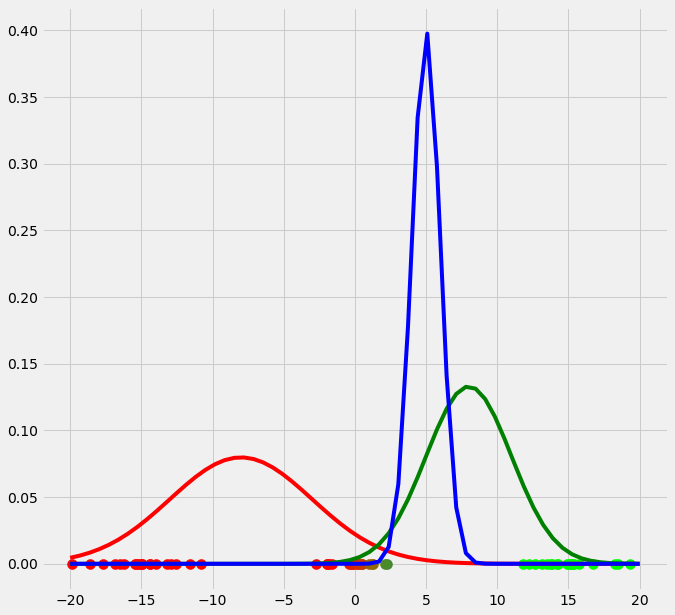

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

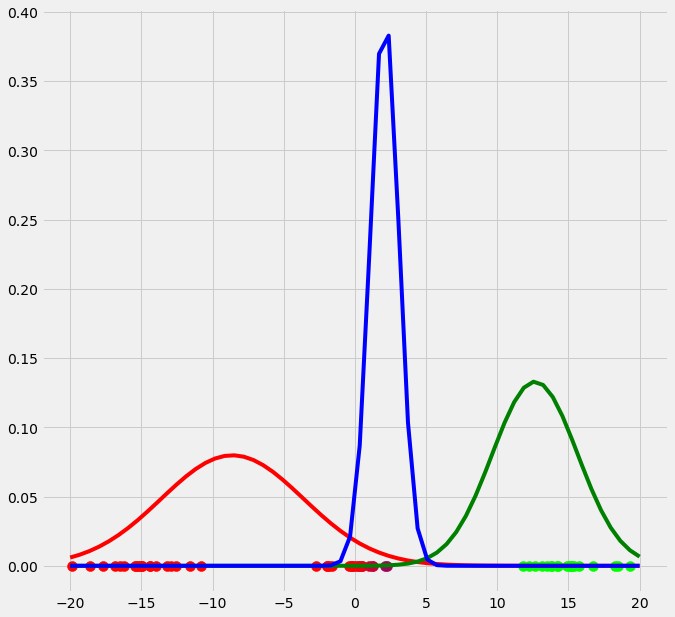

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

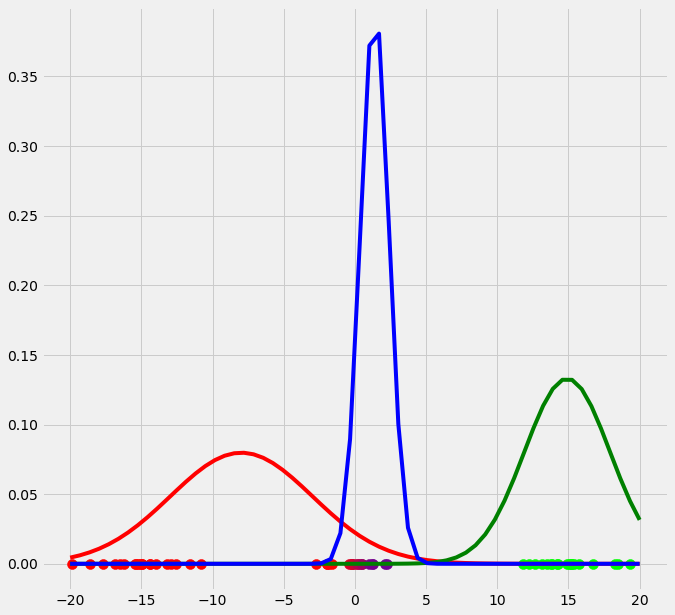

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

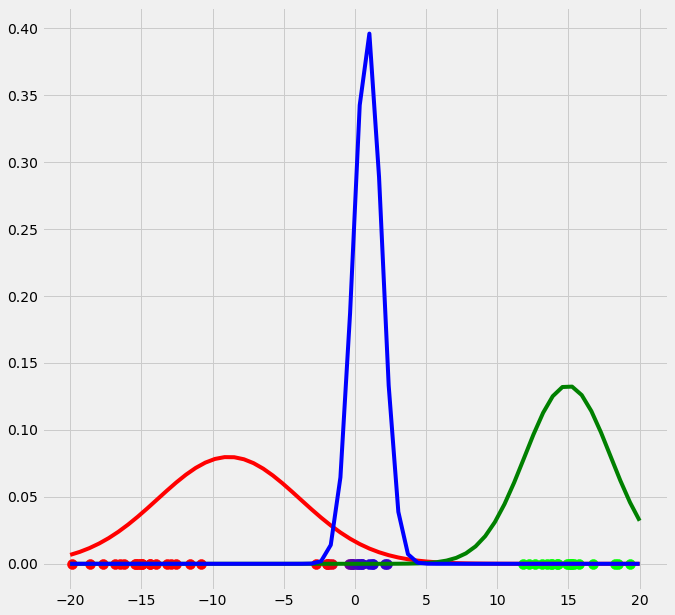

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

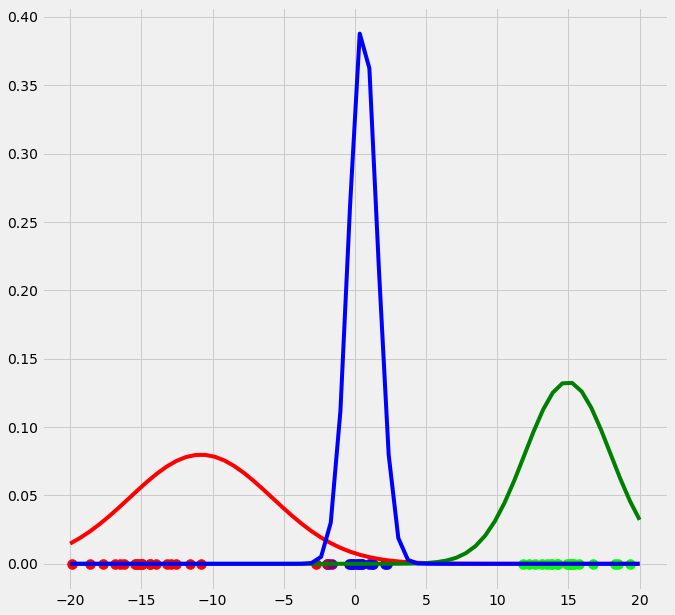

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

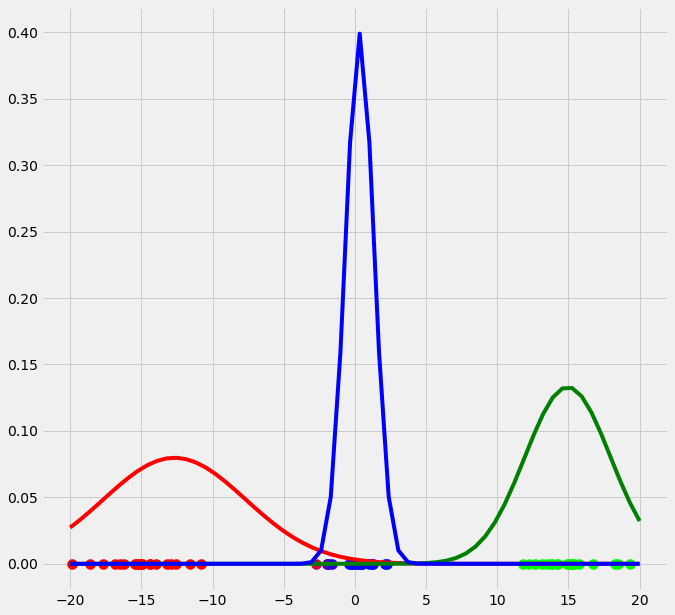

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

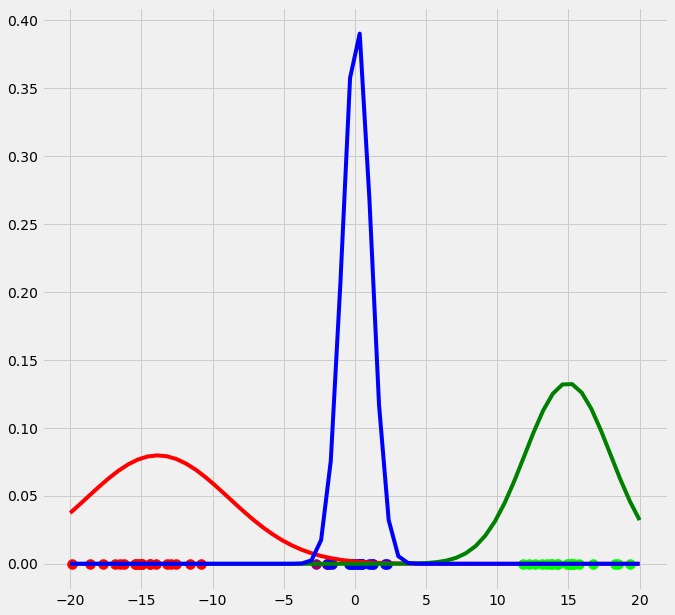

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

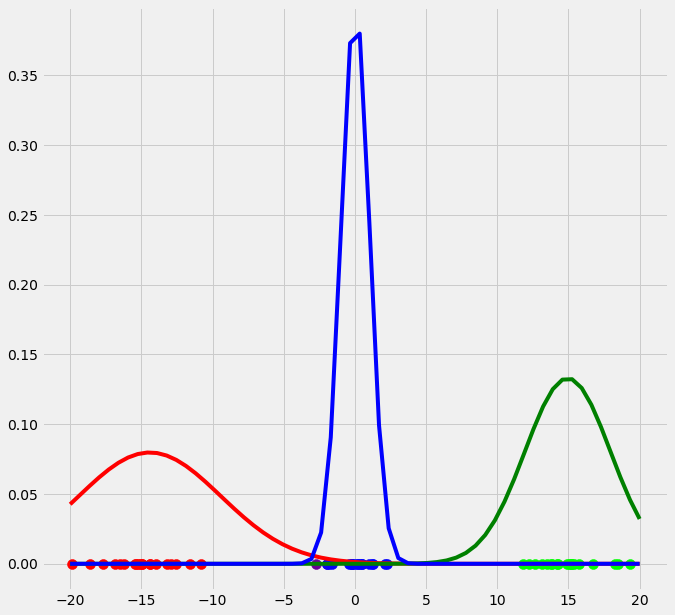

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

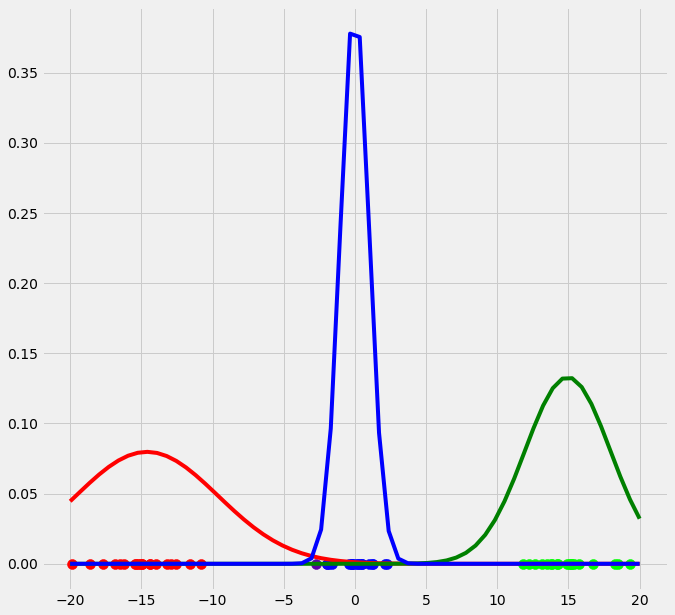

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

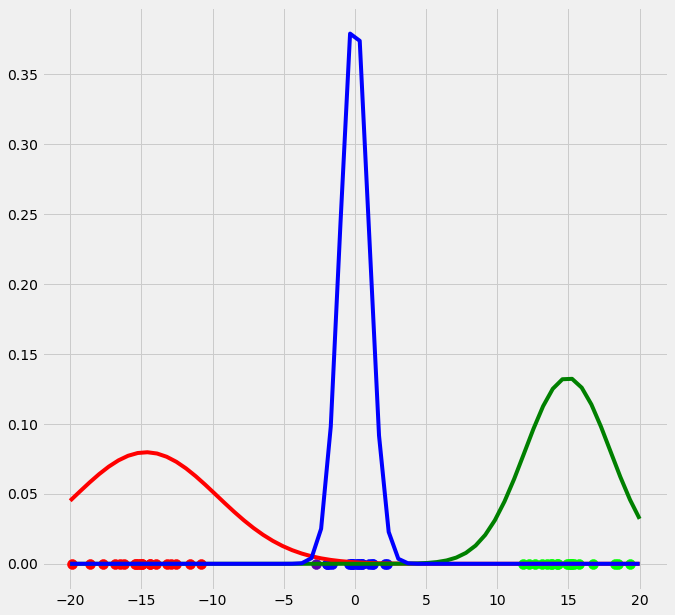

In [97]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

class GM1D:

    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
  

    def run(self):
        

        """
        Instantiate the random mu, pi and var
        """
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [5,3,1]
        
        
        
        """
        E-Step
        """
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(X_tot),3))  

  
            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                                      # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
            """
            Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
            cluster c
            """
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])


            """Plot the data"""

            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)


            for i in range(len(r)):
                ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 


            """Plot the gaussians"""


            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            
            
            
            """M-Step"""
    

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c

            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

            """calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """calculate var_c"""
            var_c = []

            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))



            plt.show()
    

GM1D = GM1D(X_tot,10)
GM1D.run()

As you can see, our three randomly initialized gaussians have fitted the data.

## Plot the log likelihood function to converge the iterative ME fitter

The last step would now be to plot the log likelihood function to show that this function converges as the number of iterations becomes large and therewith there will be no improvement in our GMM and we can stop the algorithm to iterate. Just compute the value of the loglikelihood as described in the pseudocode above for each iteration, save these values in a list and plot the values after the iterations.

# Multi dimensional case

So the difference to the one dimensional case is that our datasets do no longer consist of one column but have multiple columns and therewith our above xi is no longer a scalar but a vector (xi) consisting of as many elements as there are columns in the dataset. Since there are multiple columns, also the mean per class is no longer a scalar but μc but a vector μc consisting of as many elements as there are columns in the dataset. Also, the variance is no longer a scalar for each cluster c (σ2) but becomes a covariance matrix Σc of dimensionality nxn where n is the number of columns (dimensions) in the dataset. The calculations remain the same!

So let's derive the multi dimensional case in Python. I have added comments at all critical steps to help you to understand the code. Additionally, I have wrote the code in such a way that you can adjust how many sources (==clusters) you want to fit and how many iterations you want to run the model. By calling the EMM function with different values for number_of_sources and iterations. The actual fitting of the GMM is done in the run() function. I have also introduced a predict() function which allows us to predict the probabilities of membership for a new, unseen datapoint to belong to the fitted gaussians (clusters). So in principal, the below code is split in two parts: The run() part where we train the GMM and iteratively run through the E and M steps, and the predict() part where we predict the probability for a new datapoint. I recommend to go through the code line by line and maybe plot the result of a line with smth. like plot(result of line 44) if you are unsure what is going on -This procedure has helped the author many times-.

I have to make a final side note: I have introduced a variable called self.reg_cov. This variable is smth. we need to prevent singularity issues during the calculations of the covariance matrices. This is a mathematical problem which could arise during the calculation of the covariance matrix and hence is not critical for the understanding of the GMM itself. Though, it turns out that if we run into a singular covariance matrix, we get an error. To prevent this, we introduce the mentioned variable. For those interested in why we get a singularity matrix and what we can do against it, I will add the section "Singularity issues during the calculations of GMM" at the end of this chapter.

[3.579907995583875e-06, 0.00013180910068621591, 0.9998646109913182]

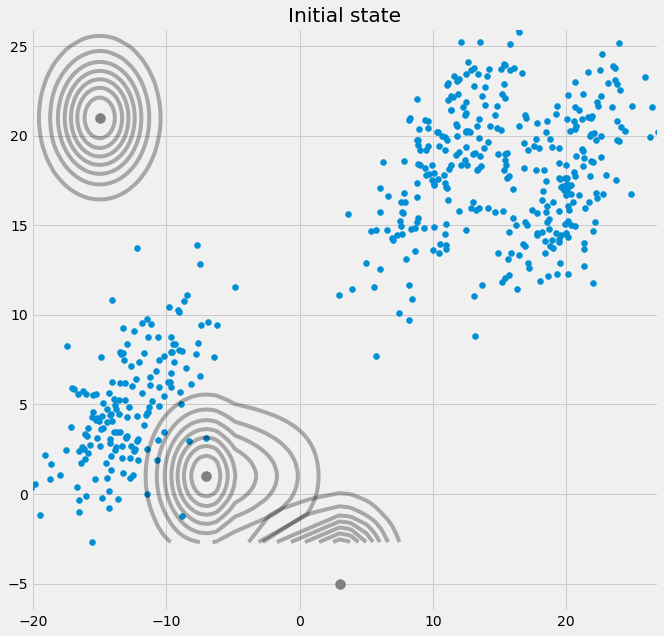

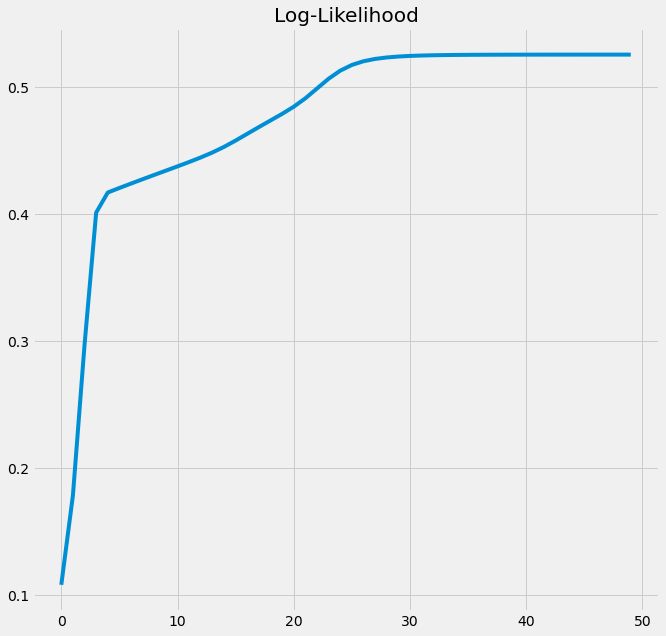

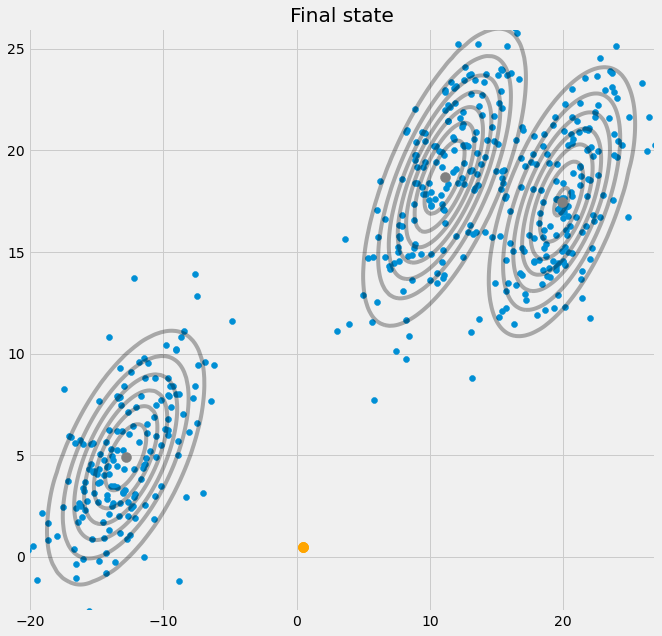

In [102]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
import numpy as np
from scipy.stats import multivariate_normal


# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)

# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))


class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """

            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1

            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            

            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,3,50)     
GMM.run()
GMM.predict([[0.5,0.5]])


---

# Apply this knowledge to Problem #1

The following a is a combination of the above work and:
https://colab.research.google.com/drive/1Eb-G95_dd3XJ-0hm2qDqdtqMugLkSYE8

## Generate a Gaussian mixture model in 2D

In [157]:
from sklearn import cluster, datasets, mixture
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

Define your gaussian distributions

In [158]:
# define the number of samples
n = 200

# define the mean points for each of the synthetic cluster centers
mu_0a = [0,0]
mu_0b = [6,4]
mu_1c = [2,3]
mu_1d = [2,-2]

t_means = [mu_0a, mu_0b, mu_1c, mu_1d] 
# t_means shape: KxN where K is the number of components and N is number of dimensions (2)

# for each cluster center, create a positive semi definite covariance matrix
cov_0a = np.array([[4,0],[0,1]])
cov_0b = np.array([[1,0],[0,4]])
cov_1c = np.array([[0.5,0],[0,1]])
cov_1d = np.array([[3,0],[0,0.75]])
t_covs = [cov_0a, cov_0b, cov_1c, cov_1d]
# t_covs shape: KxNxN where the NxN is the covariance matrix of each component K.

Generate gaussian distributions

In [159]:
X = []
for mean, cov in zip(t_means, t_covs):
    x = np.random.multivariate_normal(mean, cov, n) # create normal gaussian distributions
    X += list(x)                                    # stack points into dataset list

X = np.array(X)                                     # make numpy array (speed)
np.random.shuffle(X)                                # shuffle the data around

print("Dataset shape: ", X.shape)

Dataset shape:  (800, 2)


Create a grid over which we will calculate the probability of that point for each class

In [160]:
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)

pos = np.array([X_.flatten(),Y_.flatten()]).T       # stack meshgrid points into flat columns

print(pos.shape)
print(np.max(pos[...,1]))

(8000, 2)
9.868499771236237


Initialize the classes (clusters): centers, weights, and covariance matrices

In [161]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k                          # this assumes equal priors

# if we want to randomize the mean of each class
#means = np.random.choice(X.flatten(), (k,X.shape[1]))

# Or, for a given mean
means = t_means

print("Means: ", means)
print("Weights: ", weights)

# create and initialize a Positive semidefinite convariance matrix 

""" 
To randomize the initialize covariance matrix

cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)
"""

# if you know the covariance matrix already
cov = np.array(t_covs)

print(cov.shape)

Means:  [[0, 0], [6, 4], [2, 3], [2, -2]]
Weights:  [0.25 0.25 0.25 0.25]
(4, 2, 2)


## Compute the maximum likelihood

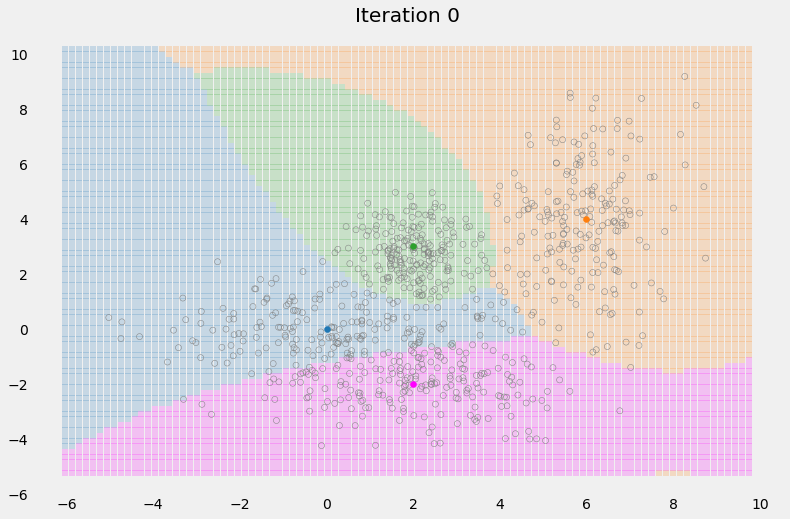

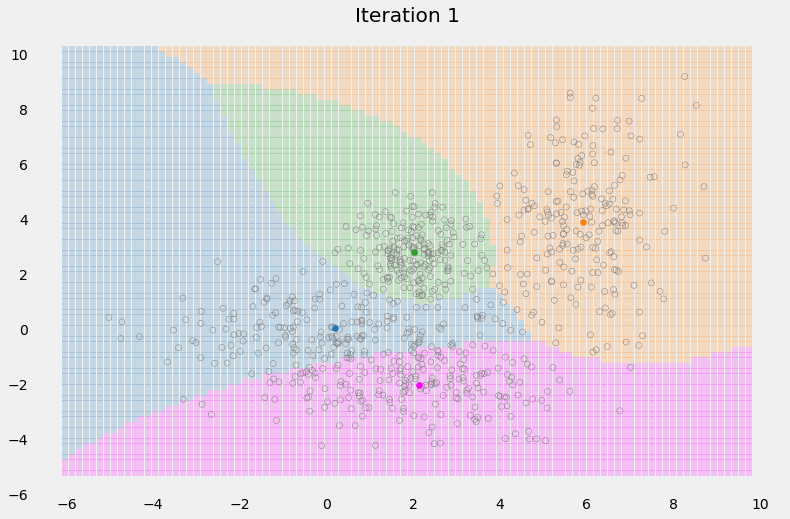

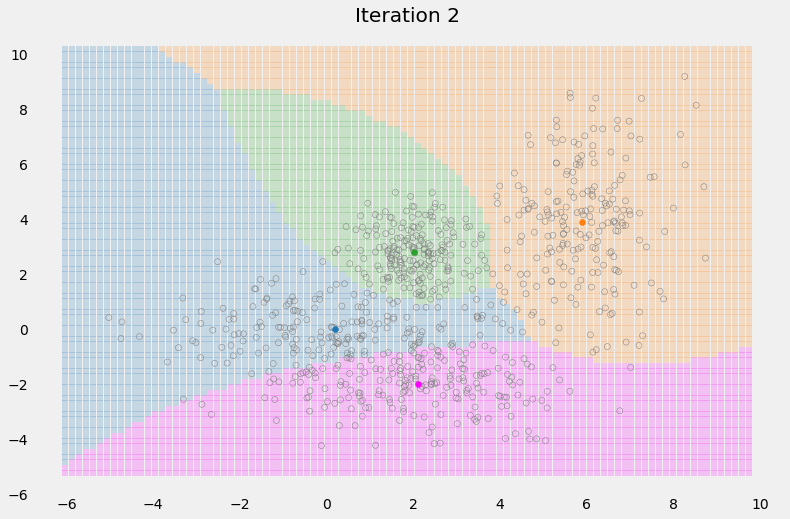

In [156]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8


# STEP 1: Loop through GMM for number of desired iterations
# run GMM for 3 steps
for step in range(1):

  # visualize the learned clusters
  if step % 1 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Iteration {}".format(step))
    axes = plt.gca()
    
    
    # ----- start ML decision rule -----
    
    # STEP 2: for each class, compute the likelihood by evaluating the probability density function
    likelihood = []
    for j in range(k):
        
        # Compute the probability density function for each class
        likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    
    likelihood = np.array(likelihood)
    
    # STEP 3: Apply the Maximum Likelihood Decision Rule to determine most probable class.
    predictions = np.argmax(likelihood, axis=0)
    
    # STEP 4: Scatter plot the highest likelihood class with the corresponding color (decision boundary) 
    for c in range(k):
        
        pred_ids = np.where(predictions == c)
        plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    # plot the means of each class
    for j in range(k):
          plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()

  # ----- end ML decision rule -----
    
    
  # ----- start Expectation step of EM iterative method -----

  likelihood = []
    
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j])) # compute likelihood
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
    
  b = []

  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    
    # make arrays from lists
    means = np.array(means)
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

---

# Apply the Maximum Likelihood Decision Rule because we assume uniforms priors

Dataset shape:  (800, 2)
Position shape:  (8000, 2)  where pos is two columns vectors of points x and y
Means:  [[0, 0], [6, 4], [2, 3], [2, -2]]
Weights:  [0.25 0.25 0.25 0.25]
(4, 2, 2)


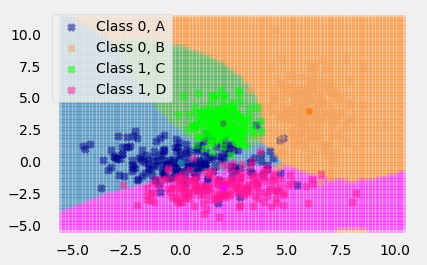

In [202]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
ccolors = ['darkblue', 'sandybrown', 'lime', 'deeppink']
labels = ['Class 0, A', 'Class 0, B', 'Class 1, C', 'Class 1, D']
eps=1e-8

# define the number of samples
n = 200

# define the mean points for each of the synthetic cluster centers
mu_0a = [0,0]
mu_0b = [6,4]
mu_1c = [2,3]
mu_1d = [2,-2]

t_means = [mu_0a, mu_0b, mu_1c, mu_1d] 
# t_means shape: KxN where K is the number of components and N is number of dimensions (2)

# for each cluster center, create a positive semi definite covariance matrix
cov_0a = np.array([[4,0],[0,1]])
cov_0b = np.array([[1,0],[0,4]])
cov_1c = np.array([[0.5,0],[0,1]])
cov_1d = np.array([[3,0],[0,0.75]])
t_covs = [cov_0a, cov_0b, cov_1c, cov_1d]
# t_covs shape: KxNxN where the NxN is the covariance matrix of each component K.

XX = []
X = []
for mean, cov in zip(t_means, t_covs):
    x = np.random.multivariate_normal(mean, cov, n) # create normal gaussian distributions
    X += list(x)                                    # stack points into dataset list
    XX.append(x)

X = np.array(X)                                     # make numpy array (speed)
np.random.shuffle(X)                                # shuffle the data around

print("Dataset shape: ", X.shape)


x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)

pos = np.array([X_.flatten(),Y_.flatten()]).T       # stack meshgrid points into flat columns

print("Position shape: ", pos.shape, " where pos is two columns vectors of points x and y")

# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k                          # this assumes equal priors

# Or, for a given mean
means = t_means

print("Means: ", means)
print("Weights: ", weights)

# create and initialize a Positive semidefinite convariance matrix 
# if you know the covariance matrix already
cov = np.array(t_covs)
print(cov.shape)


# STEP 2: for each class, compute the likelihood by evaluating the probability density function
likelihood = []
for j in range(k):
    
    # Compute the probability density function for each class
    likelihood.append(np.log(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j])))

likelihood = np.array(likelihood)
    
# STEP 3: Apply the Maximum Likelihood Decision Rule to determine most probable class.
predictions = np.argmax(likelihood, axis=0)

# STEP 4: Scatter plot the highest likelihood class with the corresponding color (decision boundary) 
for c in range(k):

    pred_ids = np.where(predictions == c)
    plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')

for c in range(k):
    plt.scatter(XX[c][:,0], XX[c][:,1], color=ccolors[c], marker='x', alpha=0.5, label=labels[c])
    
#plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')

# plot the means of each class
for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])
        
plt.legend()

#plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
plt.show()


(4, 200, 2)


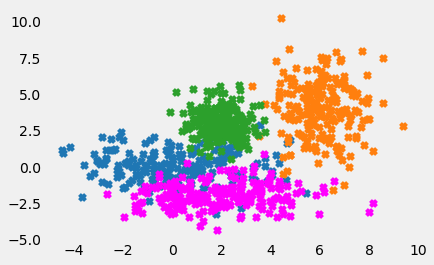

In [203]:
print(np.shape(XX))
fig, ax = plt.subplots()

for c in range(k):
    ax.scatter(XX[c][:,0], XX[c][:,1], color=colors[c], marker='x')

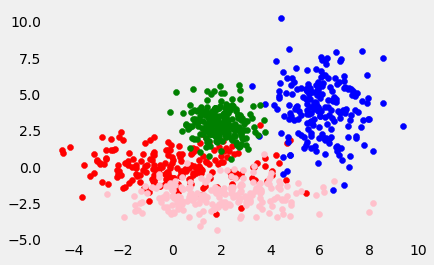

In [204]:
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green', 'pink']

for k in range(np.shape(XX)[0]):
    ax.scatter(XX[k][:,0], XX[k][:,1], color=colors[k])

Dataset shape:  (800, 2)
Position shape:  (8000, 2)  where pos is two columns vectors of points x and y
Means:  [[0, 0], [6, 4], [2, 3], [2, -2]]
Weights:  [0.25 0.25 0.25 0.25]
(4, 2, 2)


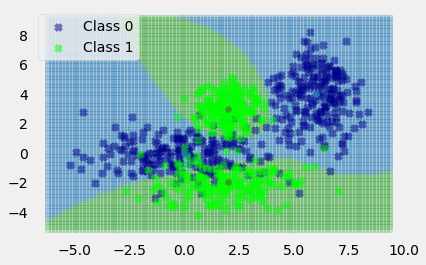

In [196]:
colors = ['tab:blue', 'tab:blue', 'tab:green', 'tab:green', 'yellow', 'red', 'brown', 'grey']
ccolors = ['darkblue', 'darkblue', 'lime', 'lime']
labels = ['Class 0', 'Class 0', 'Class 1', 'Class 1']
eps=1e-8

# define the number of samples
n = 200

# define the mean points for each of the synthetic cluster centers
mu_0a = [0,0]
mu_0b = [6,4]
mu_1c = [2,3]
mu_1d = [2,-2]

t_means = [mu_0a, mu_0b, mu_1c, mu_1d] 
# t_means shape: KxN where K is the number of components and N is number of dimensions (2)

# for each cluster center, create a positive semi definite covariance matrix
cov_0a = np.array([[4,0],[0,1]])
cov_0b = np.array([[1,0],[0,4]])
cov_1c = np.array([[0.5,0],[0,1]])
cov_1d = np.array([[3,0],[0,0.75]])
t_covs = [cov_0a, cov_0b, cov_1c, cov_1d]
# t_covs shape: KxNxN where the NxN is the covariance matrix of each component K.

XX = []
X = []
for mean, cov in zip(t_means, t_covs):
    x = np.random.multivariate_normal(mean, cov, n) # create normal gaussian distributions
    X += list(x)                                    # stack points into dataset list
    XX.append(x)

X = np.array(X)                                     # make numpy array (speed)
np.random.shuffle(X)                                # shuffle the data around

print("Dataset shape: ", X.shape)


x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)

pos = np.array([X_.flatten(),Y_.flatten()]).T       # stack meshgrid points into flat columns

print("Position shape: ", pos.shape, " where pos is two columns vectors of points x and y")

# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k                          # this assumes equal priors

# Or, for a given mean
means = t_means

print("Means: ", means)
print("Weights: ", weights)

# create and initialize a Positive semidefinite convariance matrix 
# if you know the covariance matrix already
cov = np.array(t_covs)
print(cov.shape)


# STEP 2: for each class, compute the likelihood by evaluating the probability density function
likelihood = []
for j in range(k):
    
    # Compute the probability density function for each class
    likelihood.append(np.log(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j])))

likelihood = np.array(likelihood)
    
# STEP 3: Apply the Maximum Likelihood Decision Rule to determine most probable class.
predictions = np.argmax(likelihood, axis=0)

# STEP 4: Scatter plot the highest likelihood class with the corresponding color (decision boundary) 
for c in range(k):

    pred_ids = np.where(predictions == c)
    plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')

for c in range(k):
    if c == 0 or c == 2:
        plt.scatter(XX[c][:,0], XX[c][:,1], color=ccolors[c], marker='x', alpha=0.5, label=labels[c])
    else:
        plt.scatter(XX[c][:,0], XX[c][:,1], color=ccolors[c], marker='x', alpha=0.5)
        
#plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')

# plot the means of each class
for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])
        
plt.legend()

#plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
plt.show()


Dataset shape:  (800, 2)
Position shape:  (8000, 2)  where pos is two columns vectors of points x and y
Means:  [[0, 0], [6, 4], [2, 3], [2, -2]]
Weights:  [0.25 0.25 0.25 0.25]
(4, 2, 2)


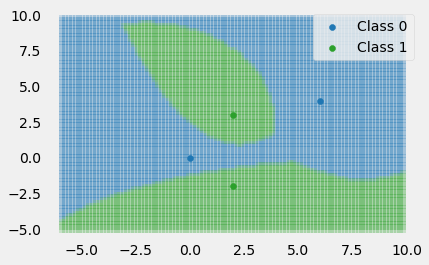

In [198]:
colors = ['tab:blue', 'tab:blue', 'tab:green', 'tab:green', 'yellow', 'red', 'brown', 'grey']
ccolors = ['darkblue', 'darkblue', 'lime', 'lime']
labels = ['Class 0', 'Class 0', 'Class 1', 'Class 1']
eps=1e-8

# define the number of samples
n = 200

# define the mean points for each of the synthetic cluster centers
mu_0a = [0,0]
mu_0b = [6,4]
mu_1c = [2,3]
mu_1d = [2,-2]

t_means = [mu_0a, mu_0b, mu_1c, mu_1d] 
# t_means shape: KxN where K is the number of components and N is number of dimensions (2)

# for each cluster center, create a positive semi definite covariance matrix
cov_0a = np.array([[4,0],[0,1]])
cov_0b = np.array([[1,0],[0,4]])
cov_1c = np.array([[0.5,0],[0,1]])
cov_1d = np.array([[3,0],[0,0.75]])
t_covs = [cov_0a, cov_0b, cov_1c, cov_1d]
# t_covs shape: KxNxN where the NxN is the covariance matrix of each component K.

XX = []
X = []
for mean, cov in zip(t_means, t_covs):
    x = np.random.multivariate_normal(mean, cov, n) # create normal gaussian distributions
    X += list(x)                                    # stack points into dataset list
    XX.append(x)

X = np.array(X)                                     # make numpy array (speed)
np.random.shuffle(X)                                # shuffle the data around

print("Dataset shape: ", X.shape)


x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)

pos = np.array([X_.flatten(),Y_.flatten()]).T       # stack meshgrid points into flat columns

print("Position shape: ", pos.shape, " where pos is two columns vectors of points x and y")

# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k                          # this assumes equal priors

# Or, for a given mean
means = t_means

print("Means: ", means)
print("Weights: ", weights)

# create and initialize a Positive semidefinite convariance matrix 
# if you know the covariance matrix already
cov = np.array(t_covs)
print(cov.shape)


# STEP 2: for each class, compute the likelihood by evaluating the probability density function
likelihood = []
for j in range(k):
    
    # Compute the probability density function for each class
    likelihood.append(np.log(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j])))

likelihood = np.array(likelihood)
    
# STEP 3: Apply the Maximum Likelihood Decision Rule to determine most probable class.
predictions = np.argmax(likelihood, axis=0)

# STEP 4: Scatter plot the highest likelihood class with the corresponding color (decision boundary) 
for c in range(k):

    pred_ids = np.where(predictions == c)
    plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')

        
#plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')

# plot the means of each class
for j in range(k):
    if j == 0 or j == 2:
        plt.scatter(means[j][0], means[j][1], color=colors[j], label=labels[j])
    else:
        plt.scatter(means[j][0], means[j][1], color=colors[j])
        
plt.legend()

#plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
plt.show()
